## HELP Clustering Assignment - Cluster countries

Things to Do:
1. Data Inspection and EDA
2. Outlier analysis
3. Try both K-Mean and heirarchical methods
4. Analyse clusters by comparing 3 variables gdpp, child_mort and income
5. perform visualization on cluster
6. Report atleast 5 countries



The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and reco

### 1. Read and understand Data

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [158]:

dataDict_df = pd.read_csv("data-dictionary+.csv", sep=",", encoding="ISO-8859-1", header=0)
dataDict_df

,ï»¿Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [159]:
country_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [160]:
country_df.shape

(167, 10)

In [161]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- No missing values present so data is almost clean

### 2. Data Preparation

In [162]:
#converting % to numbers
country_df['exports'] = country_df['exports'] * country_df['gdpp']/100
country_df['imports'] = country_df['imports'] * country_df['gdpp']/100
country_df['health'] = country_df['health'] * country_df['gdpp']/100

In [163]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [164]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [165]:
country_df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


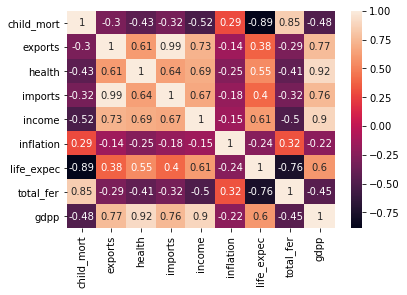

In [166]:
sns.heatmap(country_df.corr(),annot = True)
plt.show()

- there seems to be close relationship between:
    - child_mort and life_expec - 0.89
    - imports and exports - 0.99
    - total_fer and income - 0.5
    - incom and life_expec - 0.61
    - income and gdpp - 0.9
    - income and exports - 0.52
    - income and child_mort - 0.52
    - life_expect and total_ferr - 0.76
    - total_ferr and child_mort - 0.85
    - gdpp and life_expec - 0.55
    - gdpp and exports - 0.77
    - exports and health - 0.61
    - health and gdpp - 0.92
    - health income - 0.69
    - health and imports - 0.64
    - imports and income - 0.67

In [167]:
country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<AxesSubplot:xlabel='gdpp'>

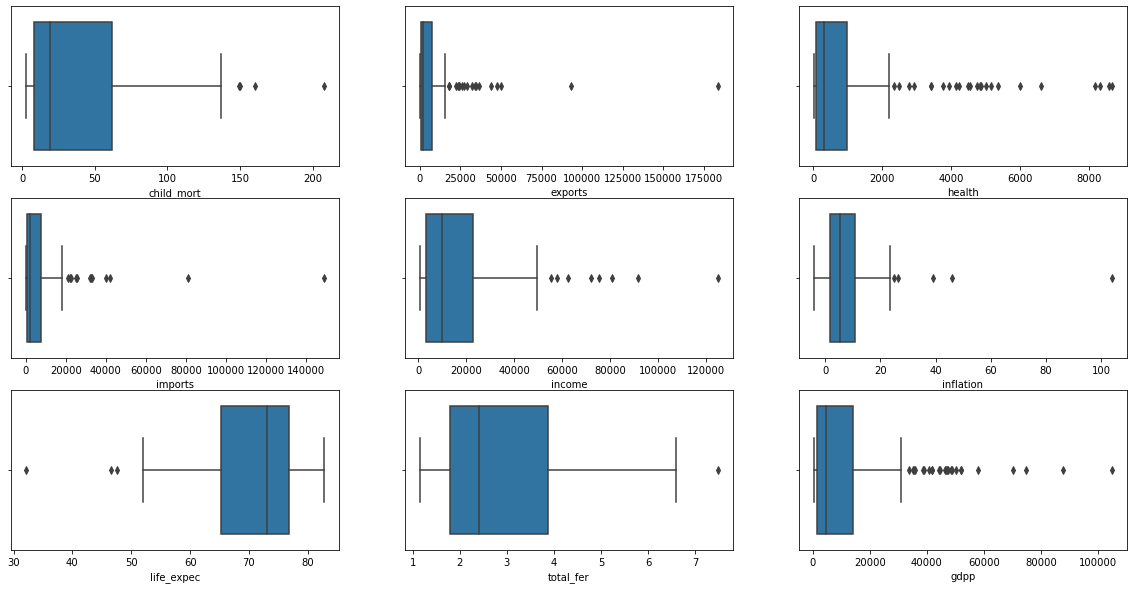

In [168]:
#finding outlier

fig, axes = plt.subplots(3, 3, figsize=(20, 10))

sns.boxplot(ax=axes[0,0], x=country_df.child_mort)

sns.boxplot(ax=axes[0,1], x=country_df.exports)

sns.boxplot(ax=axes[0,2], x=country_df.health)

sns.boxplot(ax=axes[1,0], x=country_df.imports)

sns.boxplot(ax=axes[1,1], x=country_df.income)

sns.boxplot(ax=axes[1,2], x=country_df.inflation)

sns.boxplot(ax=axes[2,0], x=country_df.life_expec)

sns.boxplot(ax=axes[2,1], x=country_df.total_fer)

sns.boxplot(ax=axes[2,2], x=country_df.gdpp)


- removing or capping any variable outliers will remove the countries which actually need funding so keeping it as it

In [169]:
# scaling of data
numCol_country_df = country_df[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]

# instantiate
scaler = StandardScaler()

# fit_transform
numCol_country_df_scaled = scaler.fit_transform(numCol_country_df)
numCol_country_df_scaled.shape

(167, 9)

In [170]:
numCol_country_df_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [171]:
numCol_country_df_scaled = pd.DataFrame(numCol_country_df_scaled)
numCol_country_df_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
numCol_country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### 3. Modelling by K-Means

### Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [172]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [173]:
hopkins(numCol_country_df_scaled)

0.9477318593652725

In [174]:
hopkins(numCol_country_df_scaled)

0.9477964274014375

In [175]:
hopkins(numCol_country_df_scaled)

0.9489727113378704

- all the times Hopkins value is greater than 0.7 so it will cluster

#### Finding the Optimal Number of Clusters

#### SSD

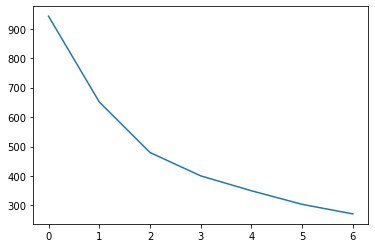

In [176]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(numCol_country_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [177]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(numCol_country_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(numCol_country_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42914711278370843
For n_clusters=5, the silhouette score is 0.4324001169216119
For n_clusters=6, the silhouette score is 0.405524012004562
For n_clusters=7, the silhouette score is 0.3094054909508284
For n_clusters=8, the silhouette score is 0.2932801105553242


- numbers of clusters = 3 or 4

In [178]:
#  model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(numCol_country_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [179]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2], dtype=int32)

In [180]:
# assign the label
country_df['cluster_id_3'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


<AxesSubplot:xlabel='cluster_id_3', ylabel='health'>

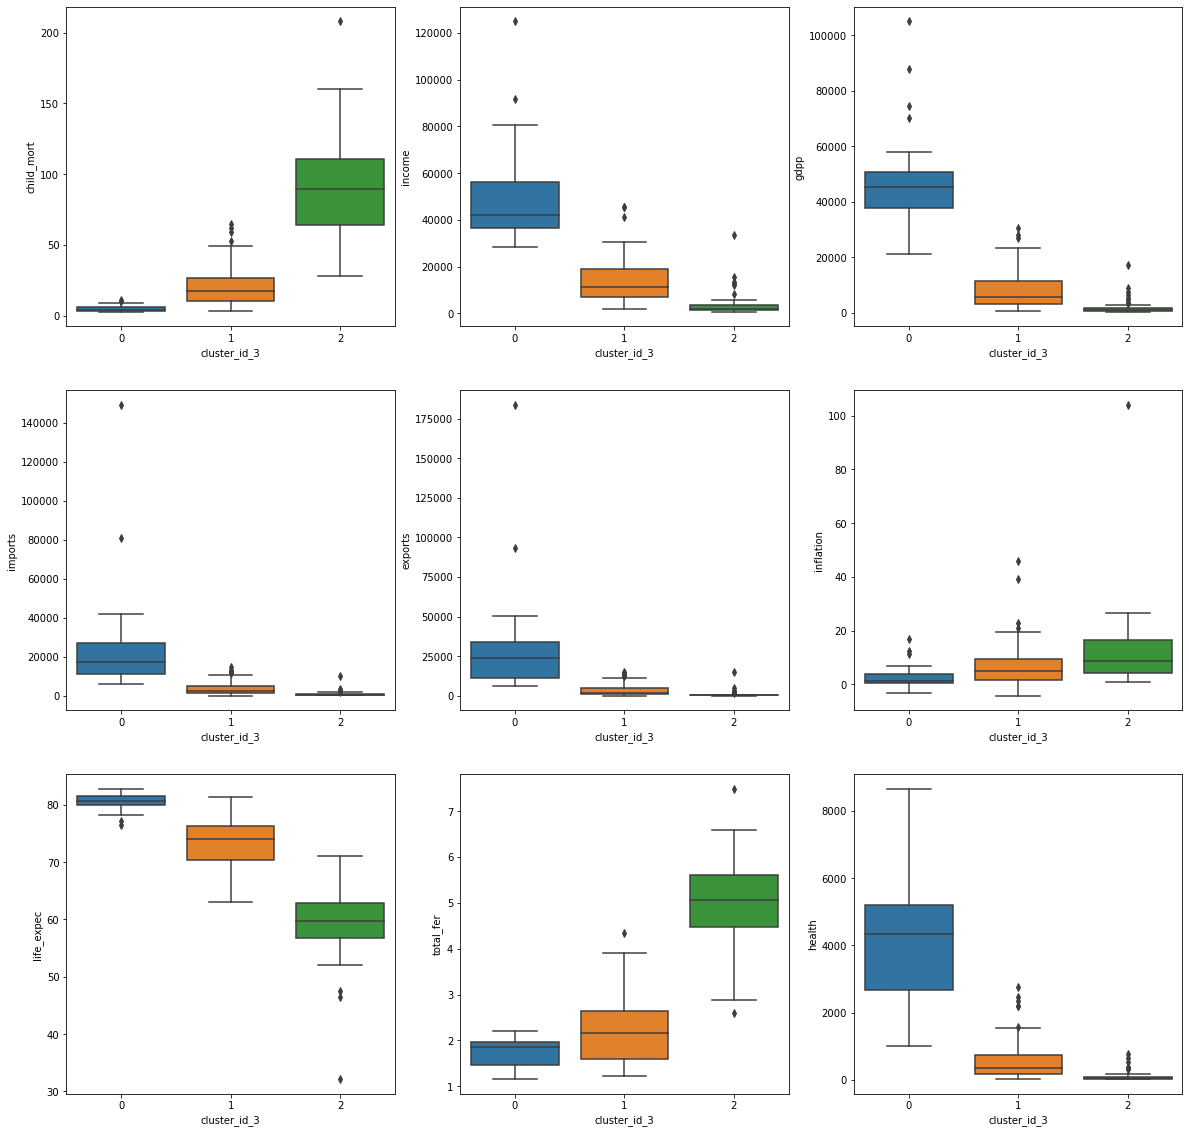

In [181]:
#analyzing with 3

fig, axes = plt.subplots(3, 3, figsize=(20, 20))

sns.boxplot(ax=axes[0,0], x=country_df.cluster_id_3, y=country_df.child_mort)

sns.boxplot(ax=axes[0,1], x=country_df.cluster_id_3, y=country_df.income)

sns.boxplot(ax=axes[0,2], x=country_df.cluster_id_3, y=country_df.gdpp)

sns.boxplot(ax=axes[1,0], x=country_df.cluster_id_3, y=country_df.imports)

sns.boxplot(ax=axes[1,1], x=country_df.cluster_id_3, y=country_df.exports)

sns.boxplot(ax=axes[1,2], x=country_df.cluster_id_3, y=country_df.inflation)

sns.boxplot(ax=axes[2,0], x=country_df.cluster_id_3, y=country_df.life_expec)

sns.boxplot(ax=axes[2,1], x=country_df.cluster_id_3, y=country_df.total_fer)

sns.boxplot(ax=axes[2,2], x=country_df.cluster_id_3, y=country_df.health)

In [182]:
#  model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(numCol_country_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [183]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [184]:
# assign the label
country_df['cluster_id_4'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,0


<AxesSubplot:xlabel='cluster_id_4', ylabel='health'>

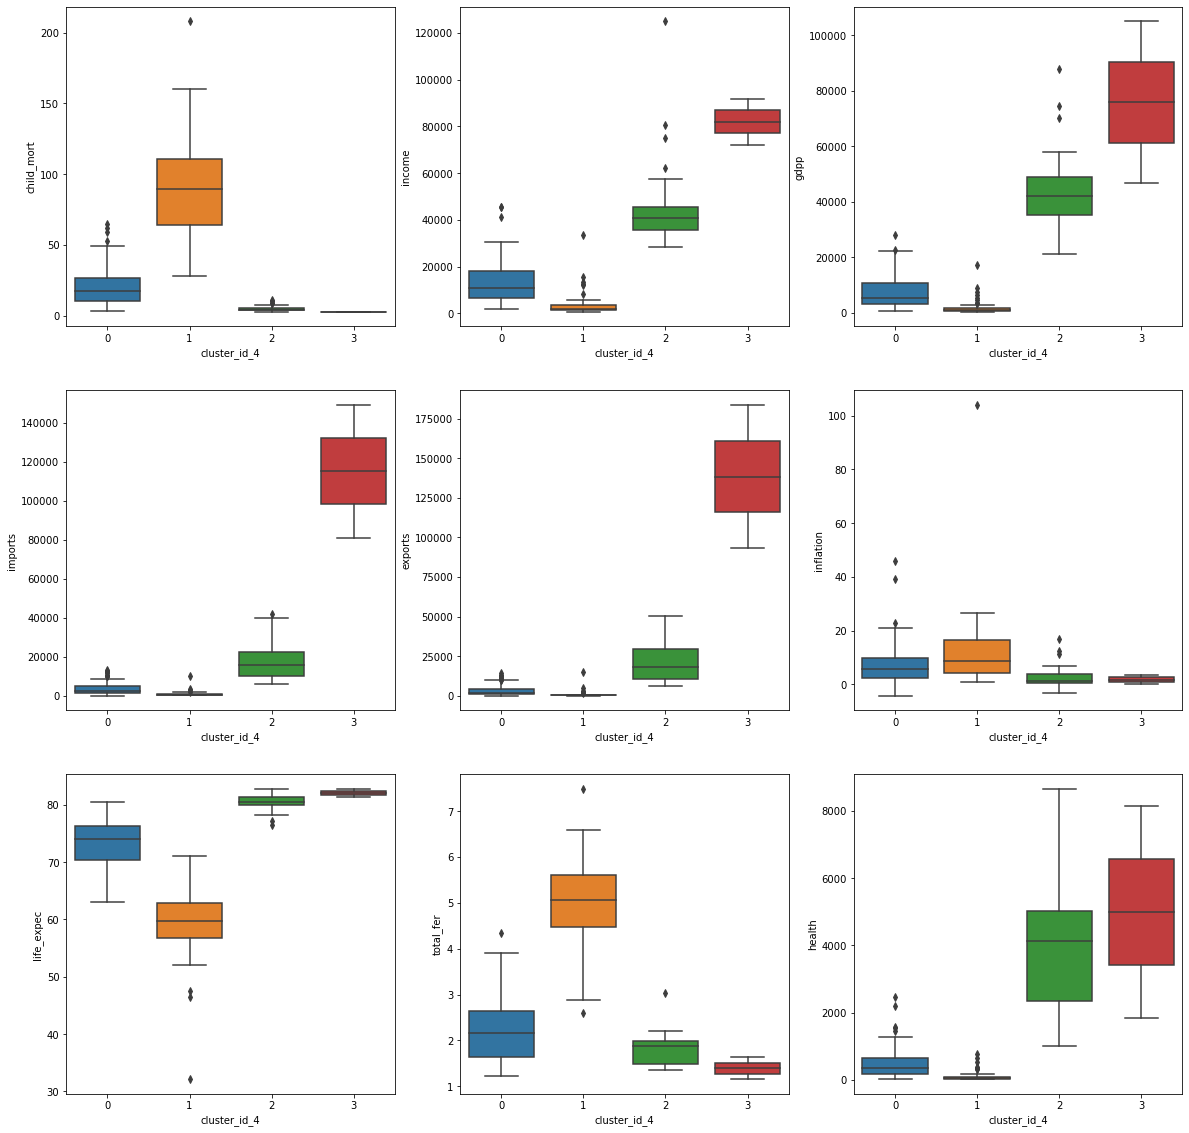

In [185]:
#analyzing with 4

fig, axes = plt.subplots(3, 3, figsize=(20, 20))

sns.boxplot(ax=axes[0,0], x=country_df.cluster_id_4, y=country_df.child_mort)

sns.boxplot(ax=axes[0,1], x=country_df.cluster_id_4, y=country_df.income)

sns.boxplot(ax=axes[0,2], x=country_df.cluster_id_4, y=country_df.gdpp)

sns.boxplot(ax=axes[1,0], x=country_df.cluster_id_4, y=country_df.imports)

sns.boxplot(ax=axes[1,1], x=country_df.cluster_id_4, y=country_df.exports)

sns.boxplot(ax=axes[1,2], x=country_df.cluster_id_4, y=country_df.inflation)

sns.boxplot(ax=axes[2,0], x=country_df.cluster_id_4, y=country_df.life_expec)

sns.boxplot(ax=axes[2,1], x=country_df.cluster_id_4, y=country_df.total_fer)

sns.boxplot(ax=axes[2,2], x=country_df.cluster_id_4, y=country_df.health)

In [186]:
# Checking the number of countries in each cluster

country_df.cluster_id_3.value_counts()

1    91
2    48
0    28
Name: cluster_id_3, dtype: int64

In [187]:
# Checking the number of countries in each cluster

country_df.cluster_id_4.value_counts()

0    88
1    48
2    29
3    2 
Name: cluster_id_4, dtype: int64

- if clustering was done basis of 3 cluster
    - cluster 0 has high child mortality with low income and gdpp
- if clustering was done basis of 3 cluster
    - cluster 1 has high child mortality with low income and gdpp
- 3 cluster look more balanced than 4 as in fourth cluster 2 datapoints only which could be because of outlier

#### Hierarchical Clustering

In [188]:
numCol_country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [189]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,0


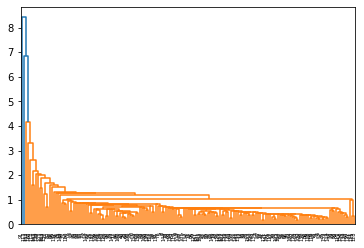

In [190]:
# single linkage
mergings = linkage(numCol_country_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

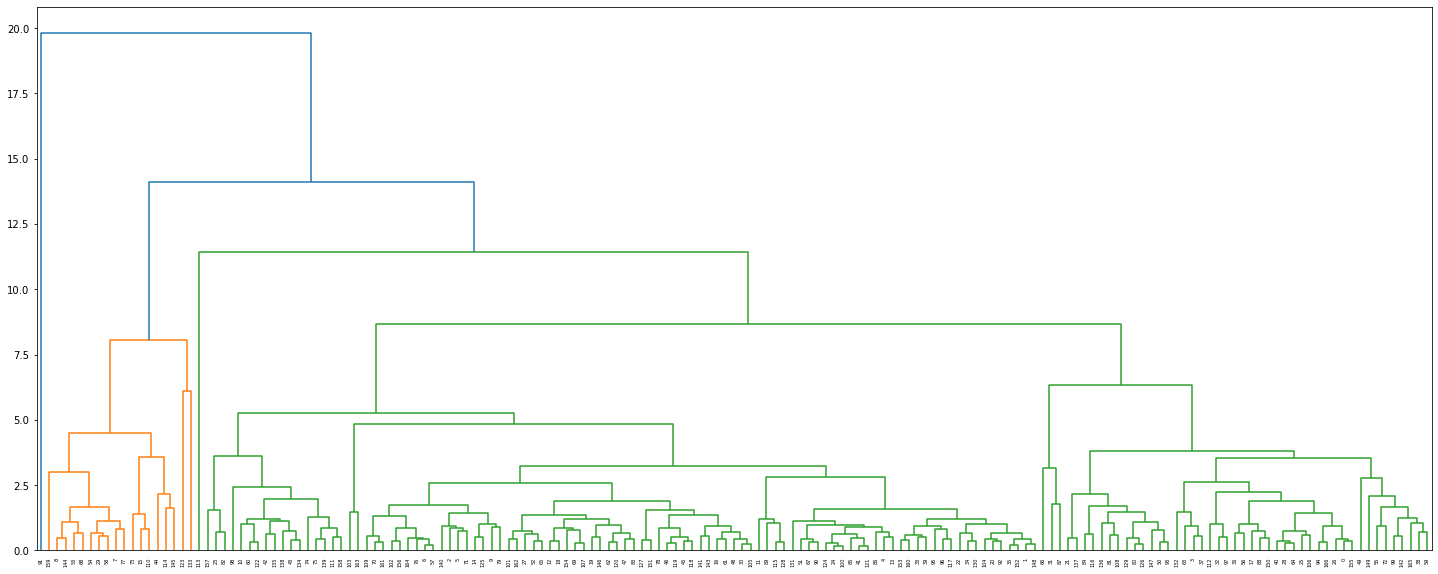

In [191]:
# complete linkage
plt.figure(figsize=(25, 10))
mergings = linkage(numCol_country_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()


In [192]:
# 3 clusters
cluster_labels_3 = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 4, 4, 7, 0, 0, 3, 0, 1, 0, 7, 0, 7,
       0, 6, 0, 1, 1, 7, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 4, 4,
       3, 0, 0, 7, 0, 1, 7, 0, 7, 4, 4, 7, 1, 0, 3, 7, 4, 0, 7, 1, 1, 7,
       1, 0, 4, 7, 7, 0, 7, 3, 4, 4, 0, 4, 0, 0, 7, 7, 6, 7, 7, 0, 0, 1,
       1, 0, 0, 2, 0, 7, 1, 0, 0, 1, 4, 1, 0, 7, 0, 7, 0, 0, 1, 7, 7, 7,
       3, 4, 1, 5, 3, 0, 7, 0, 0, 0, 7, 0, 4, 6, 0, 0, 7, 7, 0, 7, 0, 0,
       1, 6, 4, 4, 7, 7, 4, 4, 0, 0, 1, 0, 3, 3, 7, 1, 0, 1, 1, 7, 0, 0,
       7, 1, 0, 6, 4, 3, 0, 7, 7, 0, 0, 7, 1], dtype=int32)

In [193]:
# assign cluster labels with 3 cluster
country_df['cluster_labels_3'] = cluster_labels_3
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_3,cluster_id_4,cluster_labels_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,0,0


<AxesSubplot:xlabel='cluster_labels_3', ylabel='health'>

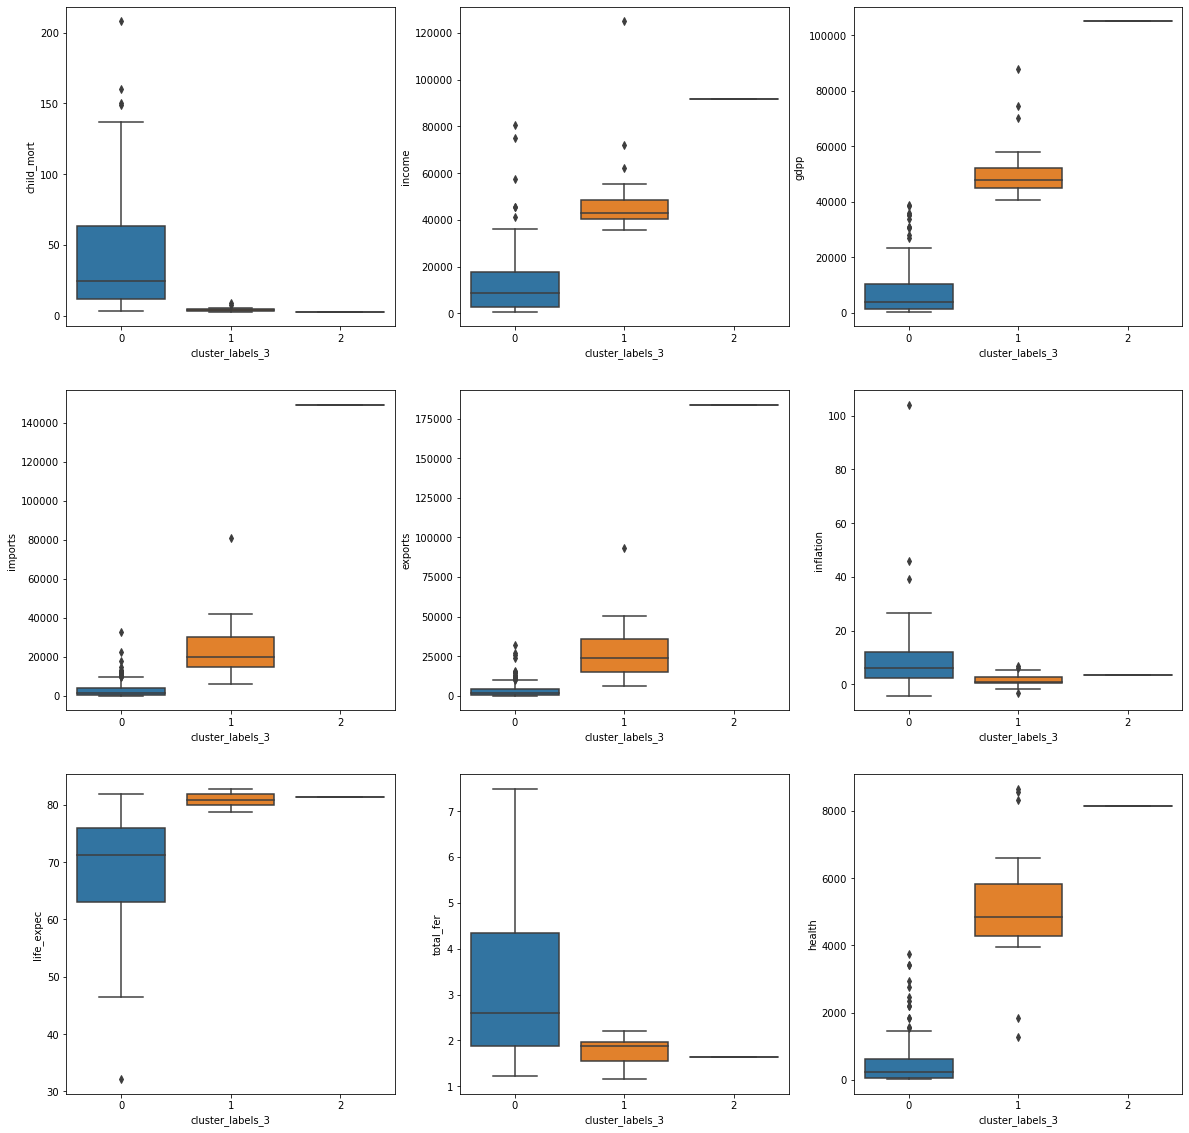

In [194]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

sns.boxplot(ax=axes[0,0], x=country_df.cluster_labels_3, y=country_df.child_mort)

sns.boxplot(ax=axes[0,1], x=country_df.cluster_labels_3, y=country_df.income)

sns.boxplot(ax=axes[0,2], x=country_df.cluster_labels_3, y=country_df.gdpp)

sns.boxplot(ax=axes[1,0], x=country_df.cluster_labels_3, y=country_df.imports)

sns.boxplot(ax=axes[1,1], x=country_df.cluster_labels_3, y=country_df.exports)

sns.boxplot(ax=axes[1,2], x=country_df.cluster_labels_3, y=country_df.inflation)

sns.boxplot(ax=axes[2,0], x=country_df.cluster_labels_3, y=country_df.life_expec)

sns.boxplot(ax=axes[2,1], x=country_df.cluster_labels_3, y=country_df.total_fer)

sns.boxplot(ax=axes[2,2], x=country_df.cluster_labels_3, y=country_df.health)

In [195]:
# Checking the number of countries in each cluster

country_df.cluster_labels_3.value_counts()

0    148
1    18 
2    1  
Name: cluster_labels_3, dtype: int64

In [196]:
# 4 clusters
cluster_labels_4 = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels_4

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [197]:
# assign cluster labels with 3 cluster
country_df['cluster_labels_4'] = cluster_labels_4
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_3,cluster_id_4,cluster_labels_3,cluster_labels_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,1,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,1,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,0,0,0


<AxesSubplot:xlabel='cluster_labels_4', ylabel='health'>

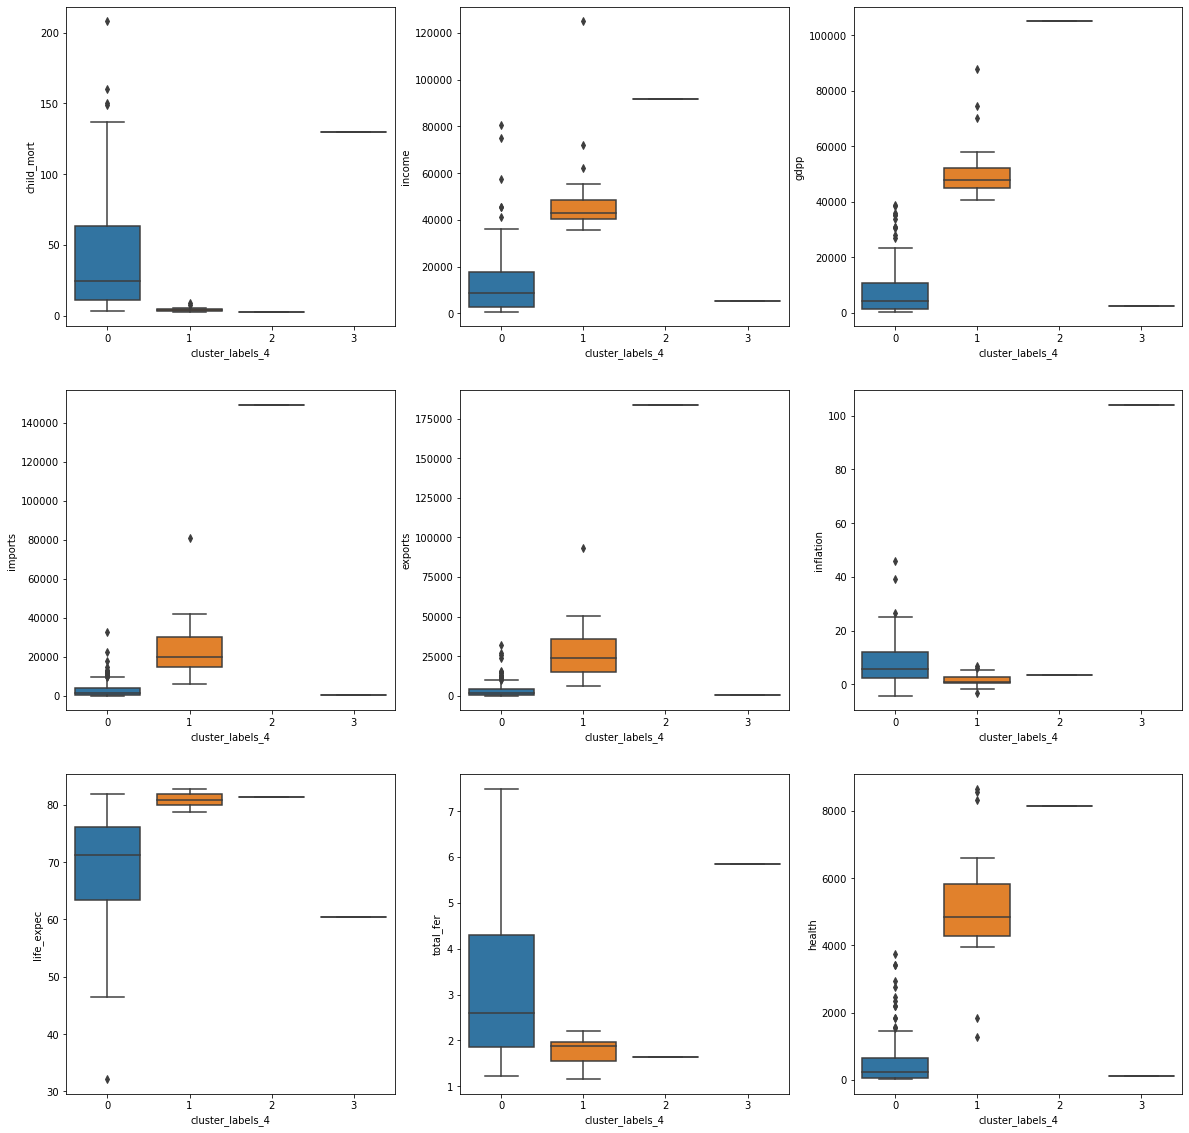

In [198]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

sns.boxplot(ax=axes[0,0], x=country_df.cluster_labels_4, y=country_df.child_mort)

sns.boxplot(ax=axes[0,1], x=country_df.cluster_labels_4, y=country_df.income)

sns.boxplot(ax=axes[0,2], x=country_df.cluster_labels_4, y=country_df.gdpp)

sns.boxplot(ax=axes[1,0], x=country_df.cluster_labels_4, y=country_df.imports)

sns.boxplot(ax=axes[1,1], x=country_df.cluster_labels_4, y=country_df.exports)

sns.boxplot(ax=axes[1,2], x=country_df.cluster_labels_4, y=country_df.inflation)

sns.boxplot(ax=axes[2,0], x=country_df.cluster_labels_4, y=country_df.life_expec)

sns.boxplot(ax=axes[2,1], x=country_df.cluster_labels_4, y=country_df.total_fer)

sns.boxplot(ax=axes[2,2], x=country_df.cluster_labels_4, y=country_df.health)

In [199]:
# Checking the number of countries in each cluster

country_df.cluster_labels_4.value_counts()

0    147
1    18 
3    1  
2    1  
Name: cluster_labels_4, dtype: int64

- from both k-mean and Heirarachical we get that 3 clusters are good enough for our analysis

In [200]:
### 4. Analysis

<AxesSubplot:xlabel='cluster_id_3'>

<Figure size 576x360 with 0 Axes>

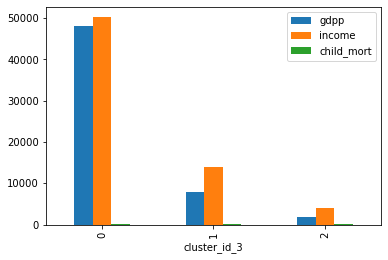

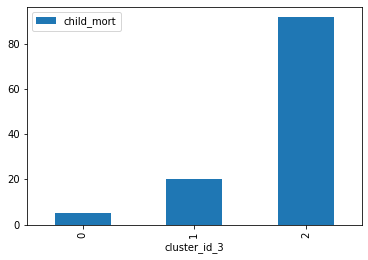

In [216]:
plt.figure(figsize=(8, 5))



country_df_plot1=country_df[['cluster_id_3','gdpp','income']].copy()
country_df_plot1=country_df_plot1.groupby('cluster_id_3').mean()
country_df_plot1.plot.bar()

country_df_plot2=country_df[['cluster_id_3','child_mort']].copy()
country_df_plot2=country_df_plot2.groupby('cluster_id_3').mean()
country_df_plot2.plot.bar()

<AxesSubplot:xlabel='cluster_labels_3'>

<Figure size 576x360 with 0 Axes>

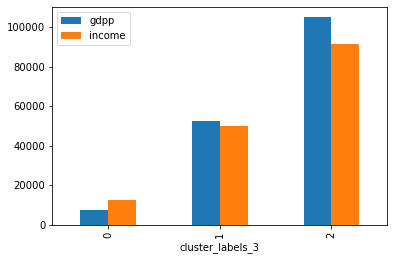

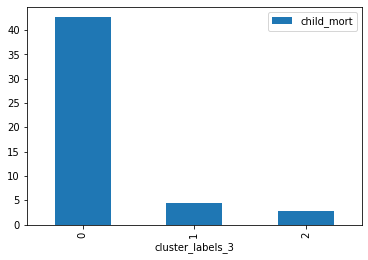

In [207]:
plt.figure(figsize=(8, 5))



country_label_df_plot1=country_df[['cluster_labels_3','gdpp','income']].copy()
country_label_df_plot1=country_label_df_plot1.groupby('cluster_labels_3').mean()
country_label_df_plot1.plot.bar()

country_label_df_plot2=country_df[['cluster_labels_3','child_mort']].copy()
country_label_df_plot2=country_label_df_plot2.groupby('cluster_labels_3').mean()
country_label_df_plot2.plot.bar()

In [213]:
# Checking the countries in cluster_id_3 cluster 2 where child mort is high.

country_df[['country','child_mort','income','gdpp']][country_df['cluster_id_3'] == 2].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708
113,Nigeria,130.0,5150,2330
112,Niger,123.0,814,348
3,Angola,119.0,5900,3530
37,"Congo, Dem. Rep.",116.0,609,334
25,Burkina Faso,116.0,1430,575


In [214]:
# Checking the countries in cluster_labels_3 cluster 0 where child mort is high.

country_df[['country','child_mort','income','gdpp']][country_df['cluster_labels_3'] == 0].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708
...,...,...,...,...
60,Greece,3.9,28700,26900
139,Spain,3.8,32500,30700
42,Cyprus,3.6,33900,30800
43,Czech Republic,3.4,28300,19800


- both gave more or less the same data so we will be taking countries in cluster_id_3 cluster 2 for further analysis

### Analysis of Countries in cluster_id_3 cluster 2 

In [220]:
# Checking the countries in cluster_id_3 cluster 2 where child mort is high.

poor_countries_df = country_df[['country','gdpp','income','child_mort']][country_df['cluster_id_3'] == 2].sort_values(['gdpp','income','child_mort'],ascending = [True,True,False])
poor_countries_df.head()

,country,gdpp,income,child_mort
26,Burundi,231,764,93.6
88,Liberia,327,700,89.3
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0


In [221]:
poor_countries_df.describe()

,gdpp,income,child_mort
count,48.000000,48.000000,48.000000
mean,1909.208333,3897.354167,91.610417
std,2925.911009,5590.168621,34.319855
min,231.000000,609.000000,28.100000
25%,551.500000,1390.000000,63.675000
50%,932.000000,1860.000000,89.750000
75%,1465.000000,3522.500000,111.000000
max,17100.000000,33700.000000,208.000000


- Need to find countries with low gdpp and low income with high mortality are best candidate for providing fund

In [224]:
poor_countries_df = poor_countries_df[(poor_countries_df['income'] <= 1860) & (poor_countries_df['gdpp'] <=932) & (poor_countries_df['child_mort']>=90)]
poor_countries_df=poor_countries_df.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [226]:
poor_countries_df.shape

(14, 4)

In [227]:
poor_countries_df

,country,gdpp,income,child_mort
26,Burundi,231,764,93.6
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0
106,Mozambique,419,918,101.0
31,Central African Republic,446,888,149.0
94,Malawi,459,1030,90.5
150,Togo,488,1210,90.3
64,Guinea-Bissau,547,1390,114.0
0,Afghanistan,553,1610,90.2


In [229]:
poor_countries_df.describe()

,gdpp,income,child_mort
count,14.000000,14.000000,14.00000
mean,490.500000,1170.928571,119.40000
std,143.745368,352.399350,33.00035
min,231.000000,609.000000,90.20000
25%,404.000000,895.500000,95.45000
50%,473.500000,1200.000000,112.50000
75%,569.500000,1420.000000,121.25000
max,758.000000,1820.000000,208.00000


### Final List of 5 countries

In [234]:
poor_countries_df.head(5)

,country,gdpp,income,child_mort
26,Burundi,231,764,93.6
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0
106,Mozambique,419,918,101.0


In [235]:
top5Countries = poor_countries_df.head(5)
top5Countries

,country,gdpp,income,child_mort
26,Burundi,231,764,93.6
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0
106,Mozambique,419,918,101.0
